In [33]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("volatility_polarity.csv")
df

,date,polarity,volatility
0,2022-02-01,-0.099338,21.959999
1,2022-02-02,0.034696,22.090000
2,2022-02-03,0.059729,24.350000
3,2022-02-04,0.132119,23.219999
4,2022-02-05,0.009562,NaN
5,2022-02-06,0.227551,NaN
6,2022-02-07,0.084230,22.860001
7,2022-02-08,0.125506,21.440001
8,2022-02-09,0.048838,19.959999
9,2022-02-10,0.082739,23.910000


In [20]:
df = df.dropna()
df

,date,polarity,volatility
0,2022-02-01,-0.099338,21.959999
1,2022-02-02,0.034696,22.090000
2,2022-02-03,0.059729,24.350000
3,2022-02-04,0.132119,23.219999
6,2022-02-07,0.084230,22.860001
7,2022-02-08,0.125506,21.440001
8,2022-02-09,0.048838,19.959999
9,2022-02-10,0.082739,23.910000
10,2022-02-11,0.040232,27.360001
13,2022-02-14,0.179456,28.330000


In [21]:
lin_reg = LinearRegression()
features = ['polarity']
X = df[features]
y = df['volatility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

# After splitting
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13, 1)
(6, 1)
(13,)
(6,)


In [22]:
lin_reg.fit(X_train, y_train)
coeff = pd.DataFrame(lin_reg.coef_, X.columns, columns=['coeff'])
score = lin_reg.score(X_train, y_train)
intercept = lin_reg.intercept_

frames = [coeff]
result = pd.concat(frames, axis=1)
result.loc['intercept'] = [intercept]
result.loc['score'] = [score]
result.round(7)

,coeff
polarity,15.007360
intercept,24.409873
score,0.132985


<AxesSubplot:xlabel='date', ylabel='polarity'>

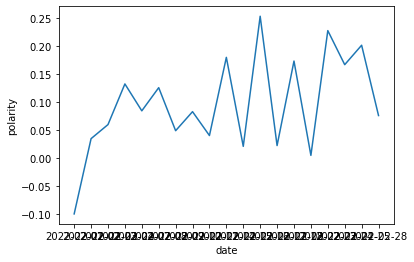

In [23]:
sns.lineplot(data=df, x="date", y="polarity")

<AxesSubplot:xlabel='date', ylabel='volatility'>

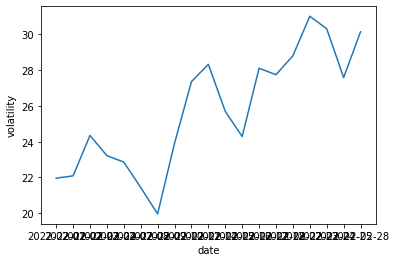

In [24]:
sns.lineplot(data=df, x="date", y="volatility")

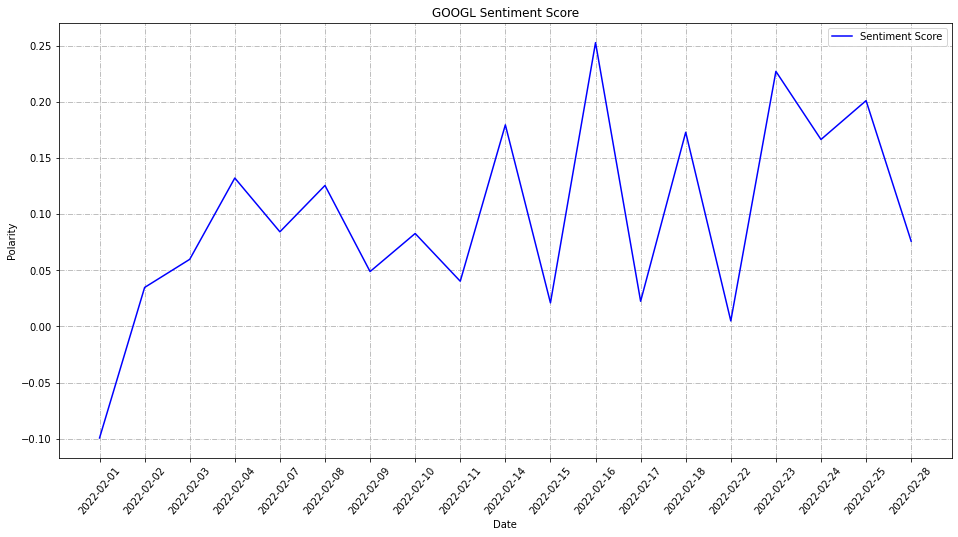

<Figure size 432x288 with 0 Axes>

In [30]:
# Sentiment Score
df.index = df['date']

plt.figure(figsize=(16, 8))
plt.plot(df.polarity, color='blue', label='Sentiment Score')
plt.setp(plt.gca().get_xticklabels(), rotation=50)
  
plt.ylabel('Polarity')
plt.xlabel('Date')
plt.title("GOOGL Sentiment Score")
plt.legend()
plt.grid(linestyle='-.')
plt.show()

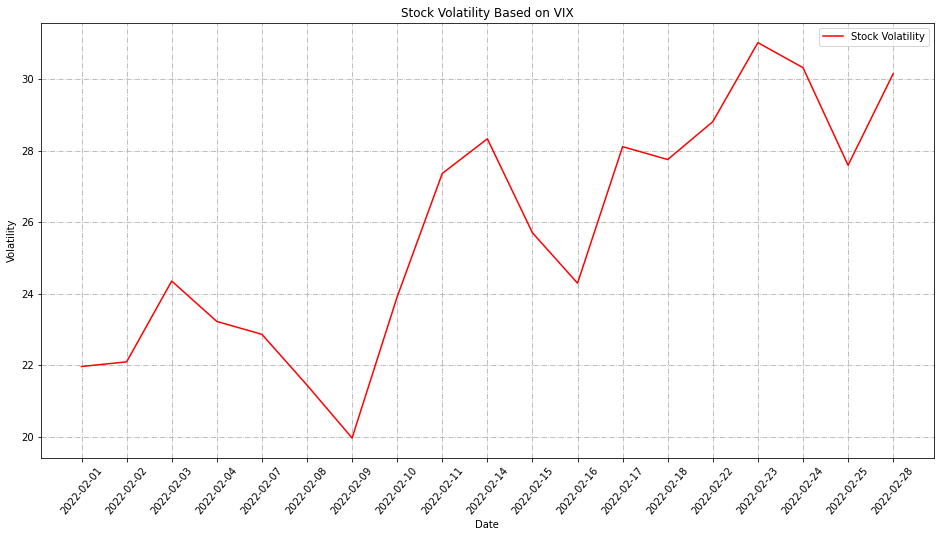

<Figure size 432x288 with 0 Axes>

In [31]:
# Stock Volatility
df.index = df['date']

plt.figure(figsize=(16, 8))
plt.plot(df.volatility, color='red', label='Stock Volatility')
plt.setp(plt.gca().get_xticklabels(), rotation=50)
  
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.title("Stock Volatility Based on VIX")
plt.legend()
plt.grid(linestyle='-.')
plt.show()